### Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

### Loading/Reading FIle

In [2]:
df = pd.read_csv("Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.rename(columns={'YearsExperience': 'Experience'}, inplace=True)
print(df.head())

   Experience   Salary
0         1.1  39343.0
1         1.3  46205.0
2         1.5  37731.0
3         2.0  43525.0
4         2.2  39891.0


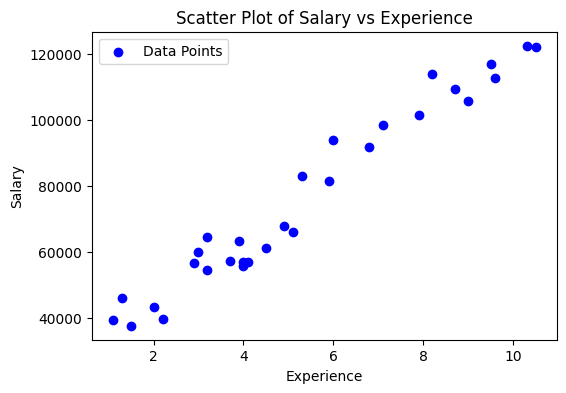

In [8]:
plt.figure(figsize=(6,4))
plt.scatter(df["Experience"], df["Salary"], color='blue', label="Data Points")
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title("Scatter Plot of Salary vs Experience")
plt.legend()
plt.show()

            Experience    Salary
Experience    1.000000  0.978242
Salary        0.978242  1.000000


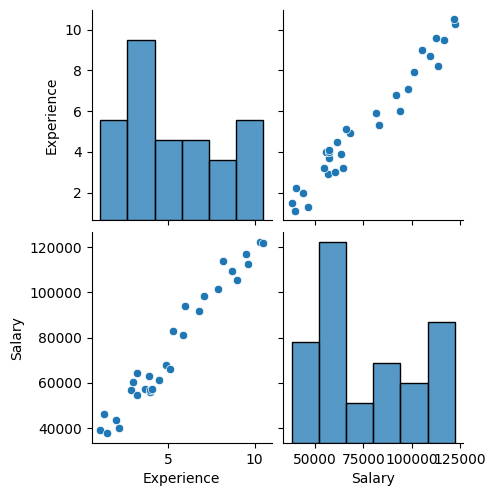

In [9]:
print(df.corr())
sns.pairplot(df)
plt.show()

In [10]:
X = df[['Experience']]       # Independent variable (2D)
Y = df['Salary']             # Dependent variable (1D)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (22, 1)
Test Shape: (8, 1)


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)          # Learn + Apply
X_test_scaled = scaler.transform(X_test)                # Apply

In [19]:
regression = SGDRegressor(
    loss='squared_error',
    learning_rate='constant',
    eta0=0.01,
    max_iter=1000,
    random_state=42
)

regression.fit(X_train_scaled, Y_train)

print("Slope:", regression.coef_)
print("Intercept:", regression.intercept_)

Slope: [25080.81868653]
Intercept: [70447.23249228]


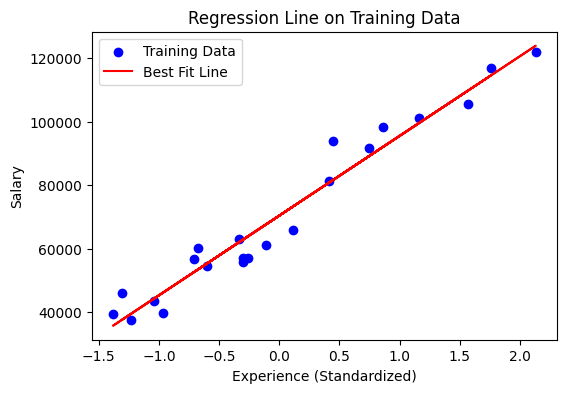

In [20]:
plt.figure(figsize=(6,4))
plt.scatter(X_train_scaled, Y_train, color='blue', label="Training Data")
plt.plot(X_train_scaled, regression.predict(X_train_scaled), color='red', label="Best Fit Line")
plt.xlabel("Experience (Standardized)")
plt.ylabel("Salary")
plt.title("Regression Line on Training Data")
plt.legend()
plt.show()

In [21]:
Y_pred = regression.predict(X_test_scaled)

In [22]:
results = pd.DataFrame({
    "Actual Salary": Y_test.values,
    "Predicted Salary": Y_pred
})
print("\nComparison of Actual vs Predicted (first 10 rows):")
print(results.head(10))


Comparison of Actual vs Predicted (first 10 rows):
   Actual Salary  Predicted Salary
0       112635.0     115502.441667
1        67938.0      71427.620204
2       113812.0     102373.771444
3        83088.0      75178.668839
4        64445.0      55485.663504
5        57189.0      60174.474298
6       122391.0     122066.776778
7       109431.0     107062.582238


In [23]:
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 38585944.177940324
MAE: 5042.759170751082
RMSE: 6211.75854150339
R2 Score: 0.9350854705198461
